The following tests whether using np.random.permutation or np.random.randint has a different effect on the clusters found in the KMeans algorithm. Using the same random seed 0 produced different results. Both versions of the algorithm achieves the same best silhouette score after running across a range of random seeds.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

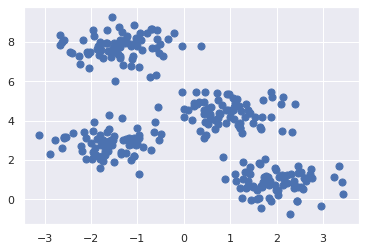

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

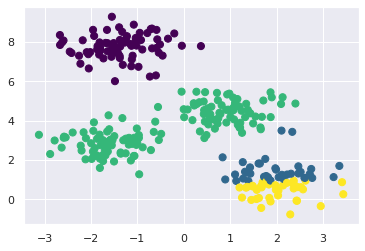

In [11]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters_permutation(X, n_clusters, rseed=0):
  state = np.random.RandomState(rseed)
  i = state.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    labels = pairwise_distances_argmin(X, centers)
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

centers, labels = find_clusters_permutation(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis")

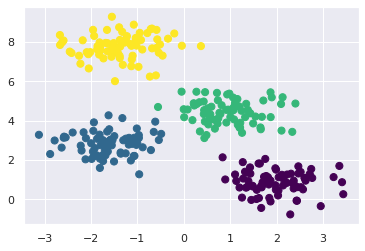

In [12]:
def find_clusters_randint(X, n_clusters, rseed=0):
  state = np.random.RandomState(rseed)
  i = state.randint(X.shape[0], size=(n_clusters))
  centers = X[i]
  while True:
    labels = pairwise_distances_argmin(X, centers)
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

centers, labels = find_clusters_randint(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis")

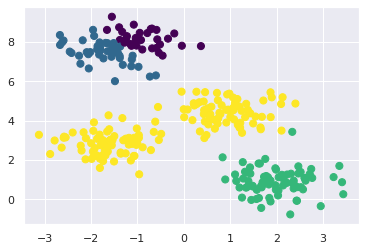

In [9]:
centers, labels = find_clusters_randint(X, 4, rseed=3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap="viridis")

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
max_silhouette_permutations = 0
max_silhouette_randint = 0
for seed in range(42):
  c1, l1 = find_clusters_permutation(X, 4, rseed=seed)
  score_permutations = silhouette_score(X, l1)
  if score_permutations > max_silhouette_permutations:
    max_silhouette_permutations = score_permutations

  c2, l2 = find_clusters_randint(X, 4, rseed=seed)
  score_randint = silhouette_score(X, l2)
  if score_randint > max_silhouette_randint:
    max_silhouette_randint = score_randint
print(max_silhouette_permutations)
print(max_silhouette_randint)

0.6819938690643478
0.6819938690643478
